In [15]:
import predict_ic50

import os

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data_dir = '/Users/nalinisingh/datasets/depmap/'

In [3]:
rnaseq = pd.read_csv(os.path.join(data_dir,'CCLE_expression.csv'))
rnaseq = rnaseq.rename(columns={'Unnamed: 0': 'DepMap_ID'})

In [4]:
crispr = pd.read_csv(os.path.join(data_dir,'Achilles_gene_effect.csv'))

In [5]:
doseresponse = pd.read_csv(os.path.join(data_dir,'sanger-dose-response.csv'))
doseresponse = doseresponse.rename(columns={'ARXSPAN_ID':'DepMap_ID'})

In [6]:
sample_info = pd.read_csv(os.path.join(data_dir,'sample_info.csv'))

In [7]:
seqresp = doseresponse.merge(rnaseq,on='DepMap_ID')

In [8]:
crisprresp = doseresponse.merge(crispr,on='DepMap_ID')

In [10]:
drug_name = 'BORTEZOMIB'
seqresp_bort = seqresp[(seqresp['DRUG_NAME']==drug_name)]
crisprresp_bort = crisprresp[(crisprresp['DRUG_NAME']==drug_name)]

In [11]:
num_rseq = len(rnaseq.columns)-1
num_mutations = len(crispr.columns)


Train R2:  0.352
Test R2:  0.207
Train Spearman Rank Corr:  0.59
Test Spearman Rank Corr:  0.474
Train Mean Absolute Error:  0.815
Test Mean Absolute Error:  0.95


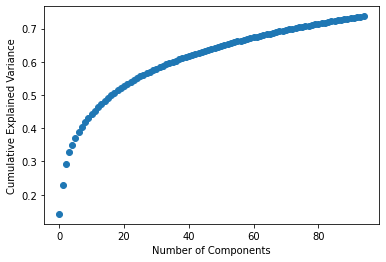

In [12]:
rna_reg, rna_train_feat, rna_train_ic50, rna_test_feat, rna_test_ic50 = predict_ic50.pca_and_linreg(seqresp_bort, num_rseq, n_components=95, alpha=0.01)

/Users/nalinisingh/anaconda3/envs/mm_disease_prog/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)



Train R2:  0.047
Test R2:  -0.027
Train Spearman Rank Corr:  0.318
Test Spearman Rank Corr:  0.29
Train Mean Absolute Error:  0.931
Test Mean Absolute Error:  0.846


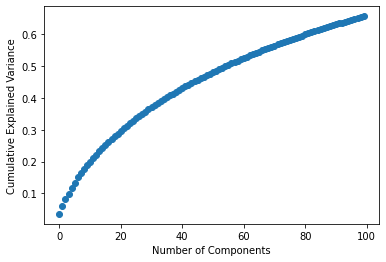

In [13]:
dna_reg, dna_train_feat, dna_train_ic50, dna_test_feat, dna_test_ic50 = predict_ic50.pca_and_linreg(crisprresp_bort, num_mutations, n_components=100, alpha=0.3, hasnans=True)

Text(0.5, 1.0, 'RNA Seq')

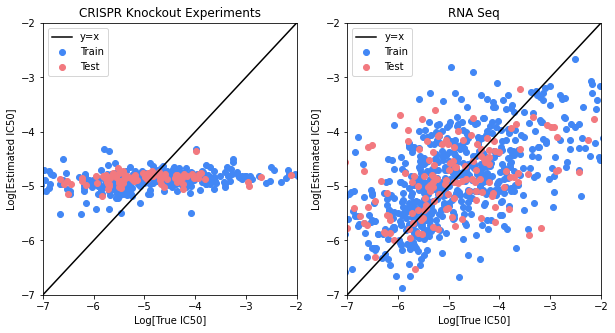

In [16]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

x = np.arange(-7,-2,0.01)
ax[0].plot(x, x, label='y=x', color='black')

ax[0].scatter(dna_train_ic50,dna_reg.predict(dna_train_feat), label='Train', color='#4287f5')
ax[0].scatter(dna_test_ic50,dna_reg.predict(dna_test_feat), label='Test', color='#f2797f')
ax[0].set_xlim(-7,-2)
ax[0].set_ylim(-7,-2)
ax[0].set_xlabel('Log[True IC50]')
ax[0].set_ylabel('Log[Estimated IC50]')
ax[0].legend()
ax[0].set_title('CRISPR Knockout Experiments')

ax[1].plot(x, x, label='y=x', color='black')

ax[1].scatter(rna_train_ic50,rna_reg.predict(rna_train_feat), label='Train', color='#4287f5')
ax[1].scatter(rna_test_ic50,rna_reg.predict(rna_test_feat), label='Test', color='#f2797f')
ax[1].set_xlim(-7,-2)
ax[1].set_ylim(-7,-2)
ax[1].set_xlabel('Log[True IC50]')
ax[1].set_ylabel('Log[Estimated IC50]')
ax[1].legend()
ax[1].set_title('RNA Seq')